# ANN Neural Network

This notebook is going to focus on building an ANN model to predict weather a bank customer is going to churn or not, using the data from the file `Churn_Modelling.csv`

### Import the libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import missingno

In [49]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

In [50]:
# Importing the dataset
df = pd.read_csv("Churn_Modelling.csv")

X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [51]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [52]:
y

array([1, 0, 1, ..., 1, 1, 0])

### Encoding the categorical data

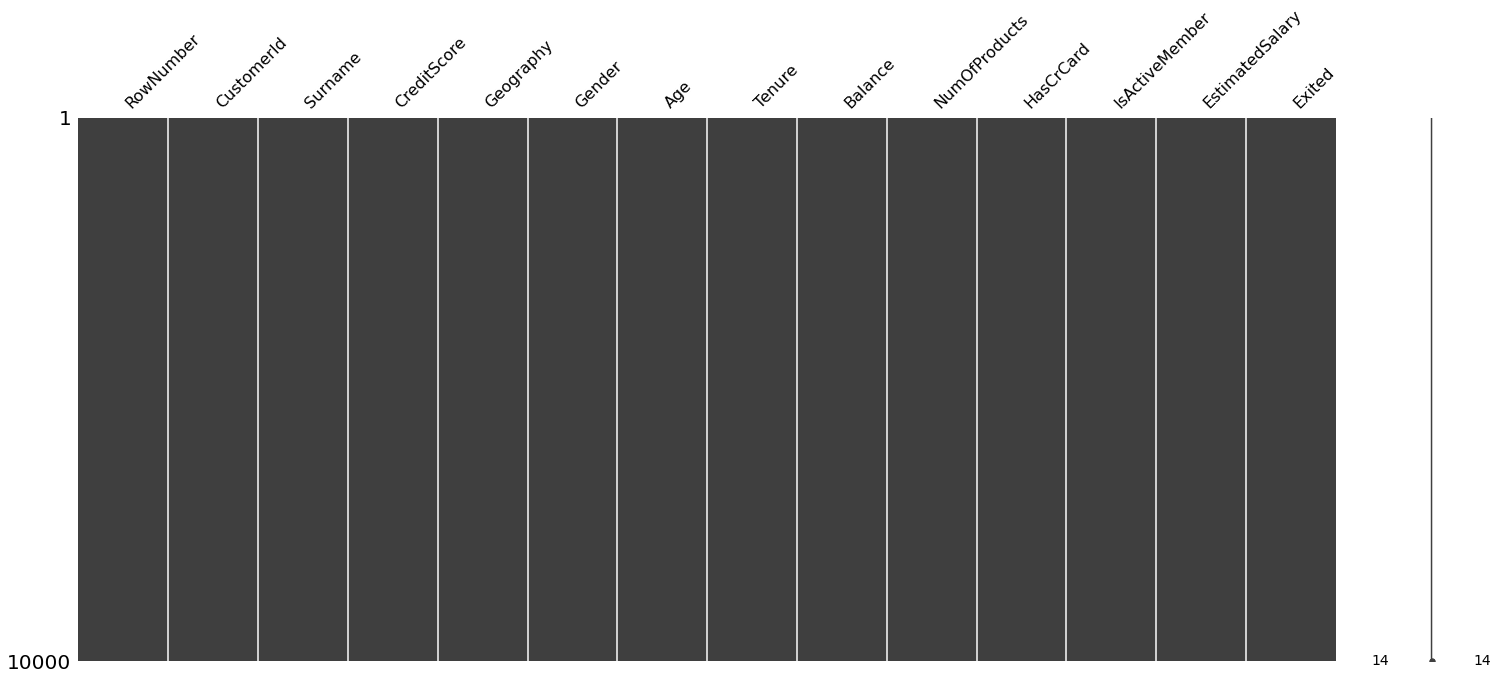

In [53]:
# Finding the missing values
missingno.matrix(df)

In [54]:
# Label encoding the gender columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [55]:
# One Hot Encoding Geographic columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])],
                      remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [56]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

### Splitting the data

In [57]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [58]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building an ANN

### Initializing an ANN

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [77]:
# Step 1: Building the ANN model
ann = Sequential()
ann.add(Dense(units=6, activation="relu"))
ann.add(Dense(units=6, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))

In [78]:
# Step 2: Compiling the model
ann.compile(optimizer="adam",
           loss="binary_crossentropy",
           metrics=["accuracy"])

In [82]:
# Step 3. Training the ANN
history = ann.fit(X_train, y_train, 
         validation_data=(X_test, y_test),
         epochs=100,
         batch_size=32)

Epoch 1/100
250/250 [==============================] - 5s 2ms/step - loss: 0.5474 - accuracy: 0.7831 - val_loss: 0.4803 - val_accuracy: 0.8010
Epoch 2/100
250/250 [==============================] - 0s 933us/step - loss: 0.4653 - accuracy: 0.8053 - val_loss: 0.4445 - val_accuracy: 0.8135
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8098 - val_loss: 0.4298 - val_accuracy: 0.8185
Epoch 4/100
250/250 [==============================] - 0s 878us/step - loss: 0.4362 - accuracy: 0.8140 - val_loss: 0.4210 - val_accuracy: 0.8230
Epoch 5/100
250/250 [==============================] - 0s 865us/step - loss: 0.4168 - accuracy: 0.8210 - val_loss: 0.4162 - val_accuracy: 0.8275
Epoch 6/100
250/250 [==============================] - 0s 820us/step - loss: 0.4271 - accuracy: 0.8178 - val_loss: 0.4110 - val_accuracy: 0.8320
Epoch 7/100
250/250 [==============================] - 0s 858us/step - loss: 0.4137 - accuracy: 0.8282 - val_loss: 0.4072 - val_accura

250/250 [==============================] - 0s 805us/step - loss: 0.3519 - accuracy: 0.8562 - val_loss: 0.3349 - val_accuracy: 0.8630
Epoch 58/100
250/250 [==============================] - 0s 728us/step - loss: 0.3372 - accuracy: 0.8627 - val_loss: 0.3354 - val_accuracy: 0.8625
Epoch 59/100
250/250 [==============================] - 0s 757us/step - loss: 0.3348 - accuracy: 0.8663 - val_loss: 0.3356 - val_accuracy: 0.8630
Epoch 60/100
250/250 [==============================] - 0s 748us/step - loss: 0.3273 - accuracy: 0.8711 - val_loss: 0.3368 - val_accuracy: 0.8595
Epoch 61/100
250/250 [==============================] - 0s 737us/step - loss: 0.3298 - accuracy: 0.8651 - val_loss: 0.3372 - val_accuracy: 0.8610
Epoch 62/100
250/250 [==============================] - 0s 769us/step - loss: 0.3375 - accuracy: 0.8625 - val_loss: 0.3356 - val_accuracy: 0.8610
Epoch 63/100
250/250 [==============================] - 0s 846us/step - loss: 0.3383 - accuracy: 0.8597 - val_loss: 0.3351 - val_accuracy

In [86]:
history_df = pd.DataFrame(history.history)

In [97]:
history_df.mean()

loss            0.352994
accuracy        0.853981
val_loss        0.349784
val_accuracy    0.855570
dtype: float64

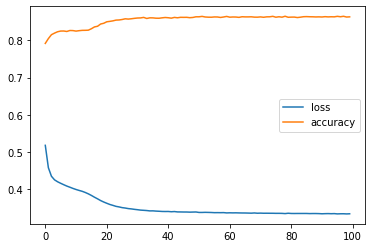

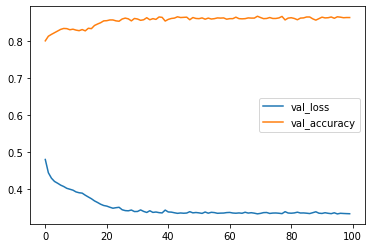

In [95]:
history_df.loc[:, ["loss", "accuracy"]].plot()
history_df.loc[:, ["val_loss", "val_accuracy"]].plot()

## Part 4: Predicting and evaluating the model


**Predict if the customer is going to churn or not:**<br>
Geography: France<br>
Credit Score: 600<br>
Gender: Male<br>
Age: 40<br>
Tenure: 3 Years<br>
Balance: 60000$<br>
Number of products: 2<br>
Does the customer have a credit card?: Yes<br>
Is the customer an Active Member?: Yes<br>
Estimated Salary: 50000<br>

Let's find out if we have to say goodbye to the customer

In [102]:
ann.predict(sc.transform([[1.0, 0.0, 0.0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5

array([[False]])

## Part 5: Predicting the test set result

In [111]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

## Part 6: Calculating the accuracy

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[1522,   73],
       [ 199,  206]])

In [114]:
accuracy_score(y_test, y_pred)

0.864